<a href="https://colab.research.google.com/github/ibshafique/mlops_with_poridhi/blob/main/prerequisite_projects/Titanic_Project/project_titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png" alt="Titanic Journey" width="1900"/>
    <p><em>Journey OF Titanic</em></p>
</div>

# Import Libraries

The required libraries are loaded here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Data Import

The train.csv and test.csv files are loaded into the notebook from the GitHub Repository.

In [2]:
train_url = 'https://raw.githubusercontent.com/ibshafique/mlops_with_poridhi/refs/heads/main/prerequisite_projects/Titanic_Project/dataset/train.csv'
test_url = 'https://raw.githubusercontent.com/ibshafique/mlops_with_poridhi/refs/heads/main/prerequisite_projects/Titanic_Project/dataset/test.csv'

#loading the datasets into pandas dataframe
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

#setting some display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Data Insights

Looking into the first 5 samples of each datasets



In [3]:
print("train_dataframe:")
train_df.head()

train_dataframe:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


getting statistical information about the datasets

In [4]:
print("train_dataframe:")
train_df.describe()

train_dataframe:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


looking into the type of data of each columns of the dataframes and their missing values

In [5]:
print("train_dataframe:")
print(train_df.info())
print()

print("test_dataframe:")
print(test_df.info())

train_dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

test_dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId

finding out the number of missing values in each colums

In [6]:
print("train_df:")
print(train_df.isnull().sum())
print()

print("test_df:")
print(test_df.isnull().sum())

train_df:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

test_df:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data Cleaning

## Filling Missing 'Age' Values With Mean
We can see that the 'Age' column has a lot of missing data.

It might be a good idea to fill up the missing data with the mean of the total age.

In [7]:
print("viewing some information about 'Age' column in train_df")
print(train_df['Age'].describe())
print()

print("viewing some information about 'Age' column in test_df")
print(test_df['Age'].describe())
print()

#replacing the missing Age values in the two dataframes with the mean.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

print("train_df:")
print(train_df.isnull().sum())
print()

print("test_df:")
print(test_df.isnull().sum())


viewing some information about 'Age' column in train_df
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

viewing some information about 'Age' column in test_df
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

train_df:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

test_df:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Dropping The 'Cabin' Column
A lot of data is also missing in the 'Cabin' column.

We may want to drop this column in both dataframes.

In [8]:
train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])

print("train_df:")
print(train_df.isnull().sum())
print()

print("test_df:")
print(test_df.isnull().sum())

train_df:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

test_df:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


## Dropping The 'PassengerID' Columns
The columns 'PassengerID' doesnot have any impact on the model.

We will drop these columns from the dataframes.

In [9]:
train_df = train_df.drop(columns=['PassengerId'])
test_df = test_df.drop(columns=['PassengerId'])

## Filling Missing 'Embarked' Values with Mode

We that only two values are missing for 'Embarked' column.
We will replace it with the mode (max frequency) value.

In [10]:
print("viewing information about 'Embarked' column")
print(train_df['Embarked'].describe())
print()

print("viewing frequency count of each values of the 'Embarked' column")
print(train_df['Embarked'].value_counts())


train_df['Embarked'] = train_df['Embarked'].fillna((train_df['Embarked'].mode()[0]))
print()

print("train_df:")
print(train_df.isnull().sum())
print()

print("test_df:")
print(test_df.isnull().sum())


viewing information about 'Embarked' column
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

viewing frequency count of each values of the 'Embarked' column
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

train_df:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

test_df:
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64


## Filling missing 'Fare' Columns With Mean

Similarly, we will replace the missing value of 'Fare' colum with the mean.

In [11]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
print()

print("train_df:")
print(train_df.isnull().sum())
print()

print("test_df:")
print(test_df.isnull().sum())


train_df:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

test_df:
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


# Feature Engineering

## Binary Encoding Values Of 'Sex' Columns
Sometimes Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. We are converting the values of 'Sex' columns.

male   --> 0

female --> 1

In [12]:
train_df['Sex'] = train_df['Sex'].map(
    {'male': 0,
    'female': 1})

test_df['Sex'] = test_df['Sex'].map(
    {'male': 0,
     'female': 1}
    )

## Label Encoding Values of 'Ages' Columns

The values of 'Ages' is continuous, so we have encoded the values in the following mapping values:

| Age Range       | Category   |
|-----------------|------------|
| `< 0`           | infant     |
| `1 to 12`       | child      |
| `13 to 18`      | teen       |
| `19 to 60`      | adult      |
| `> 60`          | seniors    |

In [13]:
# define a function for mapping age
def map_age(age):
    if age <= 0:
        return 'infant'
    elif 1 <= age <= 12:
        return 'child'
    elif 13 <= age <= 18:
        return 'teen'
    elif 19 <= age <= 60:
        return 'adult'
    else:
        return 'seniors'

# apply the function to the Age column
train_df['AgeGroup'] = train_df['Age'].apply(map_age)
test_df['AgeGroup'] = test_df['Age'].apply(map_age)

## Engineering The Passenger Names & Titles

### Extracting The Family Names

We can seperate the last names of the Passengers to figure out their family members on-board.

In [14]:
# extract family name from the 'Name' column
train_df['FamilyName'] = train_df['Name'].str.split(',').str[0]
test_df['FamilyName'] = test_df['Name'].str.split(',').str[0]

### Extracting Tiles Of The Passengers

In [15]:
# Extract titles from the 'Name' column
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

### Finding Out If A Person Is Mother

In [16]:
train_df['IsMother'] = ((train_df['Sex'] == 1) &
                        (train_df['Age'] >= 18) &
                        (train_df['Parch'] > 0) &
                        (train_df['Title'] == 'Mrs')).astype(int)

test_df['IsMother'] = ((test_df['Sex'] == 1) &
                       (test_df['Age'] >= 18) &
                       (test_df['Parch'] > 0) &
                       (test_df['Title'] == 'Mrs')).astype(int)

### Title Frequency

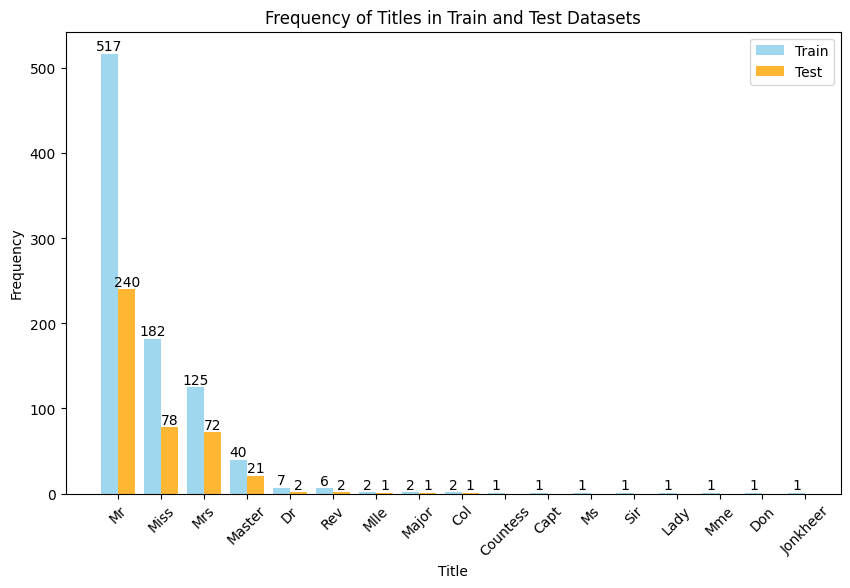

In [17]:
# Calculate the frequency of each title for train and test datasets
train_title_counts = train_df['Title'].value_counts()
test_title_counts = test_df['Title'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
x = train_title_counts.index  # Unique titles from the train set

# Plot train data bars
bars_train = plt.bar(x, train_title_counts.values, width=0.4, color='skyblue', alpha=0.8, label='Train')

# Plot test data bars (slightly shifted for clarity)
bars_test = plt.bar([i + 0.4 for i in range(len(test_title_counts))], test_title_counts.values, width=0.4, color='orange', alpha=0.8, label='Test')

# Add the values above each bar (Train Data)
for bar in bars_train:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Add the values above each bar (Test Data)
for bar in bars_test:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Add chart title, labels, and legend
plt.title('Frequency of Titles in Train and Test Datasets')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.xticks([i + 0.2 for i in range(len(x))], x, rotation=45)  # Adjust tick positions and labels
plt.legend()
plt.show()

### Figuring Out If Noble Family or Important

In [18]:
noble_titles = ['Countess', 'Lady', 'Sir', 'Jonkheer', 'Don']
train_df['IsNoble'] = train_df['Title'].isin(noble_titles).astype(int)
test_df['IsNoble'] = test_df['Title'].isin(noble_titles).astype(int)

train_df['HasPrefix'] = train_df['Name'].str.contains('Dr|Rev|Major|Col').astype(int)
test_df['HasPrefix'] = test_df['Name'].str.contains('Dr|Rev|Major|Col').astype(int)

## One Hot Encoding

One-Hot Encoding (OHE): A technique to convert categorical data into numerical format by creating separate binary columns for each unique category, using 0 and 1 to indicate the presence of each category. This is necessary because most machine learning models cannot process categorical data directly and require numerical inputs for calculations.

In [19]:
# Apply One-Hot Encoding to the 'Embarked' column
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked', drop_first=False)
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked', drop_first=False)

In [20]:
# Apply One-Hot Encoding to the 'AgeGroup' column
train_df = pd.get_dummies(train_df, columns=['AgeGroup'], prefix='AG', drop_first=False)
test_df = pd.get_dummies(test_df, columns=['AgeGroup'], prefix='AG', drop_first=False)

## Dropping Unnecessary Columns

In [21]:
# dropping the 'Age' columns from the Dataframes
train_df.drop(columns=['Age'], inplace=True)
test_df.drop(columns=['Age'], inplace=True)

# dropping the 'Name' columns from the Dataframes
train_df.drop(columns=['Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)

# dropping the 'Ticket' columns from the Dataframes
train_df.drop(columns=['Ticket'], inplace=True)
test_df.drop(columns=['Ticket'], inplace=True)

# dropping the 'Ticket' columns from the Dataframes
train_df.drop(columns=['FamilyName'], inplace=True)
test_df.drop(columns=['FamilyName'], inplace=True)

# dropping the 'Title' columns from the Dataframes
train_df.drop(columns=['Title'], inplace=True)
test_df.drop(columns=['Title'], inplace=True)

<Axes: >

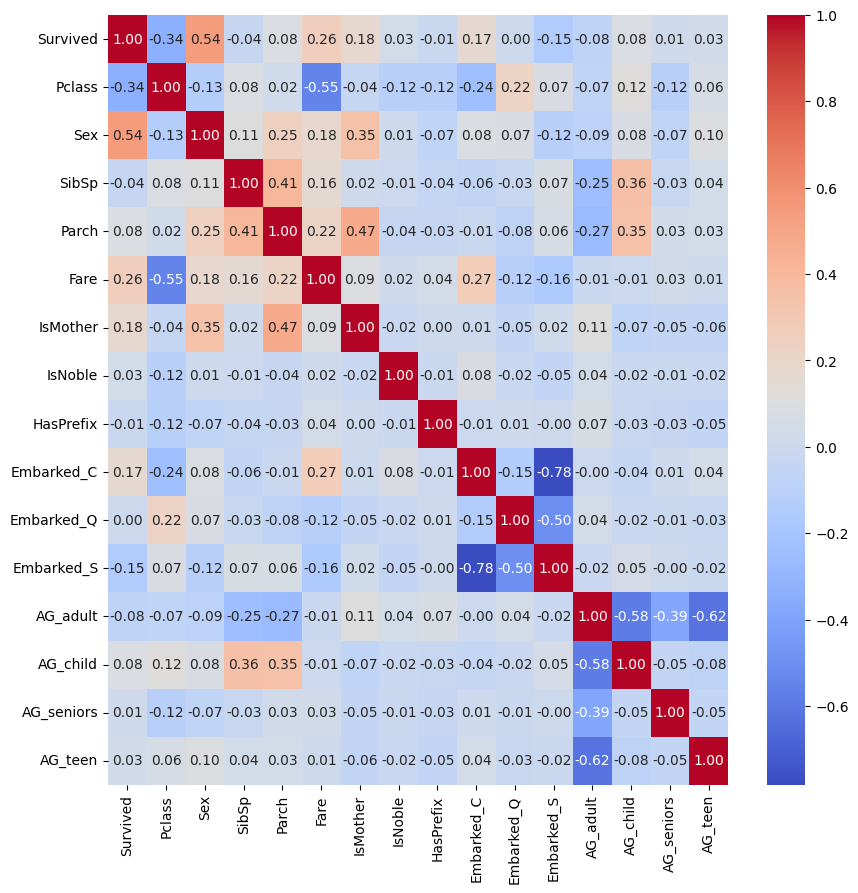

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), cmap ='coolwarm', annot=True, fmt='.2f')

# Training An ML Model

## Spliting The Training Dataset

The training dataset is split so that the machine learning model is evaluated on unseen data, which helps assess its ability to generalize to new, real-world data.

This is just to make sure the training dataset and the validation dataset have no biasness.

In [23]:
X = train_df.drop(columns=['Survived'])  # Features
y = train_df['Survived']  # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)

In [24]:
#checking the spread of the dataframes
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


# Training Data Model

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_val_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.8156424581005587


In [27]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

